In [22]:
from Functions import *
import seaborn as sns

In [12]:
data=pd.read_excel(r"../Data_and_Preprocessing/pm_flow.xlsx")
data_chem=pd.read_excel(r"../Data_and_Preprocessing/NO2_VOCs_synthetic.xlsx")

In [18]:
data_chem.columns

Index(['Unnamed: 0', 'corrected_week', 'no2', 'nox', 'formaldehyd', 'acetald',
       'acetone', 'household', 'constrution_year', 'Area', 'floor_level',
       'powerplant', 'road', 'motorway', 'forest', 'coastline', 'airport',
       'farmland', 'industrial', 'carpet', 'cookerhood', 'passive', 'gastove',
       'fireplace', 'label', 'scale_nox', 'scale_no2', 'scale_acetone',
       'scale_formaldehyd', 'scale_acetald', 'scale_vocs', 'scaled_nox',
       'scaled_no2', 'scaled_formaldehyd', 'scaled_acetone', 'scaled_acetald'],
      dtype='object')

In [14]:
gpr_no2=torch.load("models/no2_seasonality",weights_only=False,map_location='cuda')
gpr_nox=torch.load("models/nox_seasonality",weights_only=False,map_location='cuda')
gpr=torch.load("models/PM25_seasonality",weights_only=False,map_location='cuda')
gpr_bc=torch.load("models/BC_seasonality",weights_only=False,map_location='cuda')
gpr_acetone=torch.load("models/acetone_seasonality",weights_only=False,map_location='cuda')
gpr_form=torch.load("models/formaldehyd_seasonality",weights_only=False,map_location='cuda')
gpr_acetald=torch.load("models/acetald_seasonality",weights_only=False,map_location='cuda')
gpr_vocs=torch.load("models/vocs_seasonality",weights_only=False,map_location='cuda')

In [15]:
period=-26.3
data=scale_season(data,gpr_bc,period,name="scale_bc")
data=scale_season(data,gpr,period,name="scale_pm")
data_chem=scale_season(data_chem,gpr_nox,period,name="scale_nox")
data_chem=scale_season(data_chem,gpr_no2,period,name="scale_no2")
data_chem=scale_season(data_chem,gpr_acetone,period,name="scale_acetone")
data_chem=scale_season(data_chem,gpr_form,period,name="scale_formaldehyd")
data_chem=scale_season(data_chem,gpr_acetone,period,name="scale_acetone")
data_chem=scale_season(data_chem,gpr_acetald,period,name="scale_acetald")
data_chem=scale_season(data_chem,gpr_vocs,period,name="scale_vocs")

/data/michaelf/miniconda3/envs/gaussion_process/lib/python3.11/site-packages/torchquad/integration/simpson.py:75: UserWarning: N per dimension cannot be even due to necessary subdivisions. N per dim will now be changed to the next lower integer, i.e. 500 -> 499.
  warnings.warn(
/data/michaelf/miniconda3/envs/gaussion_process/lib/python3.11/site-packages/torchquad/integration/utils.py:262: UserWarning: DEPRECATION WARNING: In future versions of torchquad, an array-like object will be returned.
  warnings.warn(
/data/michaelf/miniconda3/envs/gaussion_process/lib/python3.11/site-packages/torchquad/integration/simpson.py:75: UserWarning: N per dimension cannot be even due to necessary subdivisions. N per dim will now be changed to the next lower integer, i.e. 500 -> 499.
  warnings.warn(
/data/michaelf/miniconda3/envs/gaussion_process/lib/python3.11/site-packages/torchquad/integration/utils.py:262: UserWarning: DEPRECATION WARNING: In future versions of torchquad, an array-like object wil

In [19]:
data["scaled_bc"]=data.scale_bc*data.BC_Gaussion
data["scaled_PM25"]=data.scale_pm*data.pm25_Gaussion
data_chem["scaled_nox"]=data_chem.scale_nox*data_chem.nox
data_chem["scaled_no2"]=data_chem.scale_no2*data_chem.no2
data_chem["scaled_formaldehyd"]=data_chem.scale_formaldehyd*data_chem.formaldehyd
data_chem["scaled_acetone"]=data_chem.scale_acetone*data_chem.acetone
data_chem["scaled_acetald"]=data_chem.scale_acetald*data_chem.acetald

In [20]:

data.to_excel("../Data_and_Preprocessing/Scaled_pm_bc_data.xlsx")
data_chem.to_excel("../Data_and_Preprocessing/Scaled_chem.xlsx")

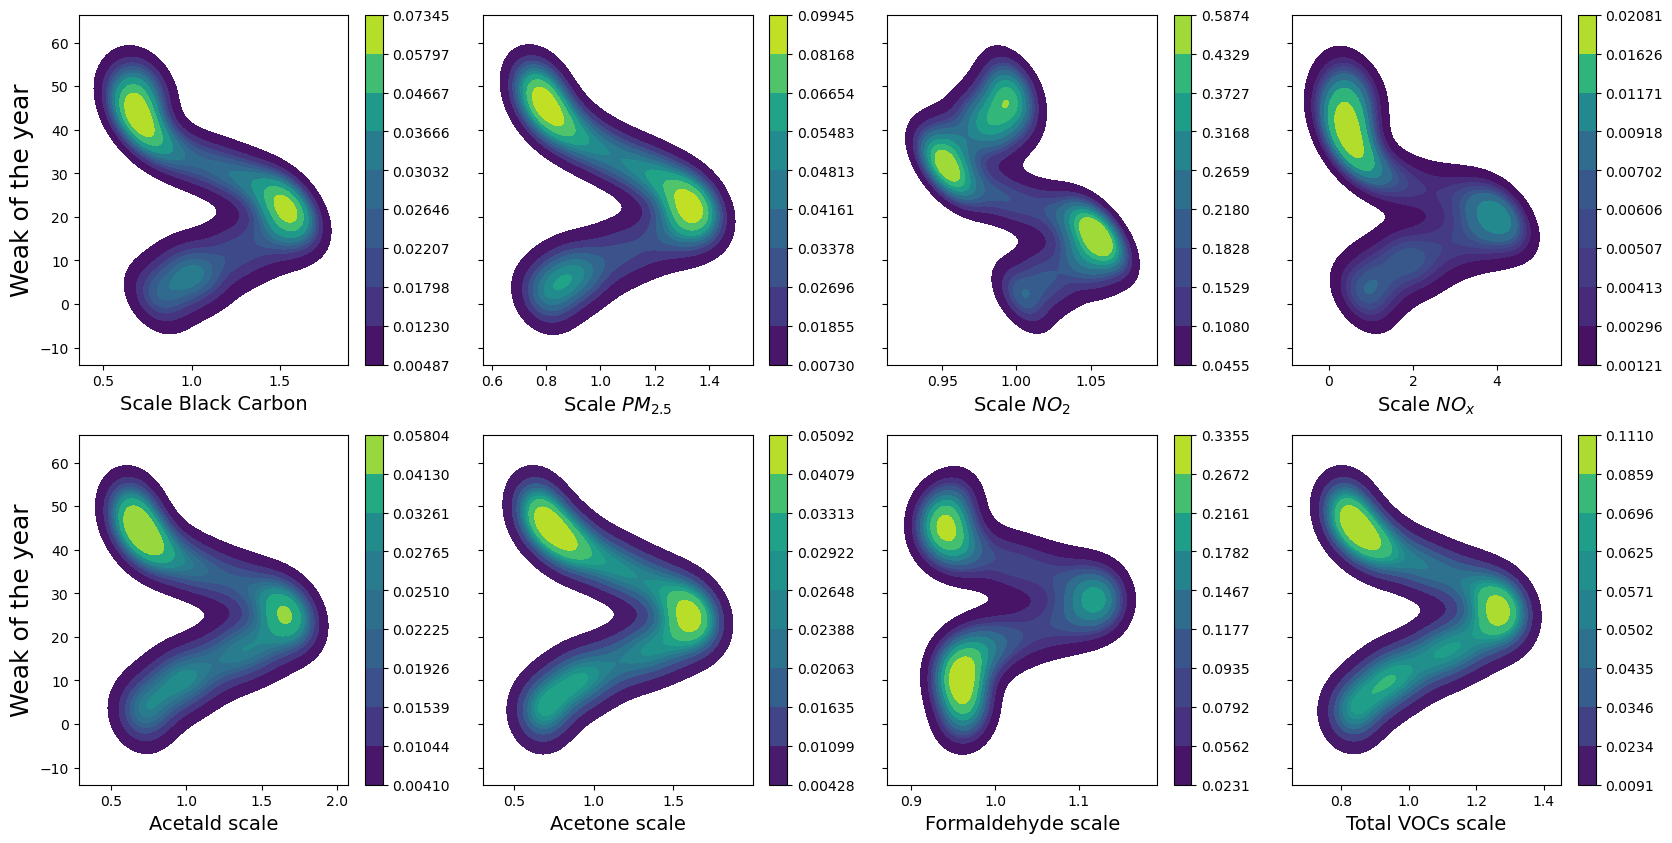

In [23]:
fig,ax=plt.subplots(2,4,figsize=(20,10), sharey=True)

sns.kdeplot(data,x="scale_bc",y="corrected_week",ax=ax[0,0],label="Black carobn",fill=True,cmap="viridis",cbar=True)


ax[0,0].set_xlabel("Scale Black Carbon",fontsize=14)
sns.kdeplot(data,x="scale_pm",y="corrected_week",ax=ax[0,1],label=r"$PM_{2.5}$",fill=True,cmap="viridis",cbar=True)


ax[0,1].set_xlabel(r"Scale $PM_{2.5}$",fontsize=14)
sns.kdeplot(data_chem,x="scale_no2",y="corrected_week",ax=ax[0,2],label=r"$NO_{2}$",fill=True,cmap="viridis",cbar=True)
sns.kdeplot(data_chem,x="scale_nox",y="corrected_week",ax=ax[0,3],label=r"$NO_{x}$",fill=True,cmap="viridis",cbar=True)
ax[0,2].set_xlabel(r"Scale $NO_{2}$",fontsize=14)
ax[0,3].set_xlabel(r"Scale $NO_{x}$",fontsize=14)
sns.kdeplot(data_chem,x="scale_acetald",y="corrected_week",ax=ax[1,0],label="Acetald",fill=True,cmap="viridis",cbar=True)
sns.kdeplot(data_chem,x="scale_acetone",y="corrected_week",ax=ax[1,1],label="Acetone",fill=True,cmap="viridis",cbar=True)
ax[1,0].set_xlabel("Acetald scale",fontsize=14)
ax[1,1].set_xlabel("Acetone scale",fontsize=14)
sns.kdeplot(data_chem,x="scale_formaldehyd",y="corrected_week",ax=ax[1,2],label="Formaldehyd",fill=True,cmap="viridis",cbar=True)
sns.kdeplot(data_chem,x="scale_vocs",y="corrected_week",ax=ax[1,3],label="VOCs",fill=True,cmap="viridis",cbar=True)
ax[1,2].set_xlabel("Formaldehyde scale",fontsize=14)
ax[1,3].set_xlabel("Total VOCs scale" ,fontsize=14)
ax[0,0].set_ylabel("Weak of the year",fontsize=18)

ax[1,0].set_ylabel("Weak of the year",fontsize=18)

fig.savefig("Plots/Scale_periodic.png",bbox_inches="tight")


In [ ]:
data.corr().loc[:,["scaled_bc","scaled_PM25","BC_Gaussion","pm25_Gaussion"]]